# Marketing Campaign Analysis

<i>by Oman Bilal

## Introduction

The notebook will accomplish the following task

<b>Overall Goal:</b><br>
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

<b>Section 01</b><br>
Exploratory Data Analysis<br>

 
<b>Section 02</b><br>
Statistical Analysis<br>

 
<b>Section 03</b><br>
Data Visualization<br>

Please plot and visualize the answers to the below questions.

 - Which marketing campaign is most successful?
 - What does the average customer look like for this company?
 - Which products are performing best?
 - Which channels are underperforming?

## Dataset
Lets start with loading and then exploring the dataset

In [1]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv(r'C:\Users\oman\Desktop\Datasets\marketing_data.csv')
print(df.info())
pd.concat([df.head(), df.tail()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


<i>***Notice that the Income column is of object dataype with dollar sign and has white space</i><br><br>
    
<b>Below is the description of all the columns in the dataset</b>
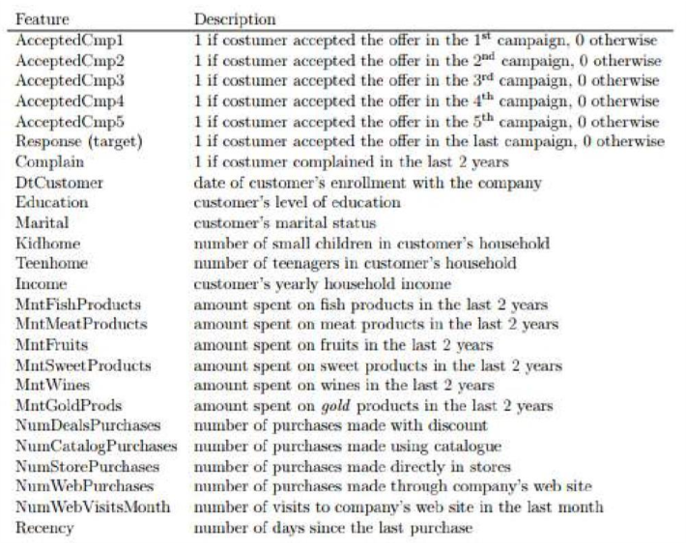

## Section 01: Exploratory Data Analysis

 - Are there any null values or outliers? How will you wrangle/handle them?
 - Are there any variables that warrant transformations?
 - Are there any useful variables that you can engineer with the given data?
 - Do you notice any patterns or anomalies in the data? Can you plot them?

In [3]:
#Removed White Space from all the columns
df.columns = df.columns.str.replace(' ','')

#Cleaned Income Column and transformed into float
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

In [4]:
df.Income.head(3)

0    84835.0
1    57091.0
2    67267.0
Name: Income, dtype: float64

<b>Are there any null values or outliers? How will you wrangle/handle them?</b>

In [5]:
df.isnull().sum().sort_values(ascending = False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

 - There are 24 null values in `Income` column.
 - Lets plot this column to decide whether to remove or impute them

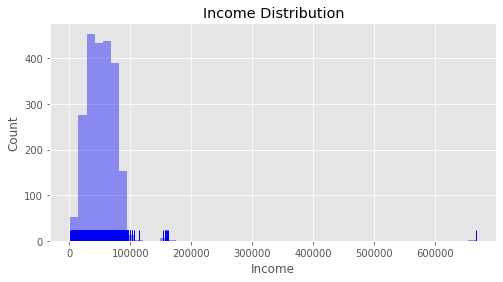

In [6]:
plt.figure(figsize = (8,4))
sns.distplot(df['Income'], color = 'blue', rug = True, kde = False)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

 - Income is distributed between 0 to 100000
 - Lets impute missing values with median

In [7]:
#Fill missing values with median values
df['Income'].fillna(df['Income'].median(), inplace = True)

In [8]:
df['Income'].isnull().sum()

0

<b>Lets identify outliers in all numerical columns</b>

In [9]:
#Create a dataframe with only required columns
df_num = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df_num.shape

(2240, 20)

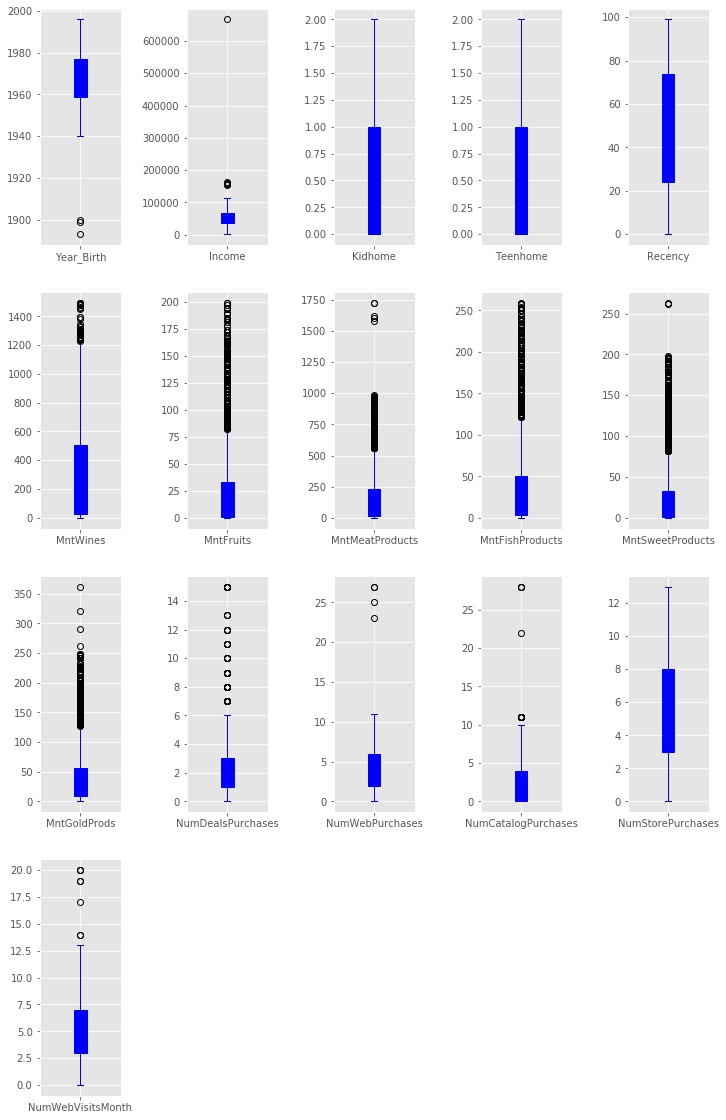

In [10]:
#Creating subplots
df_num.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,20), color = 'blue', patch_artist=True)
plt.subplots_adjust(wspace=0.8)
plt.show()

 - Multiple columns contain outliers
 - But in the year_birth column there are some values below 1900

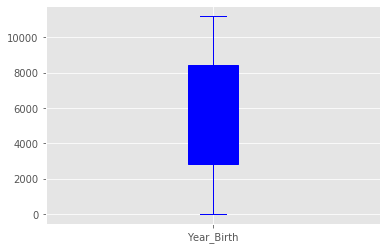

In [11]:
#Lets remove values below the year of 1900
df['Year_Birth'] = df[df['Year_Birth'] > 1900].reset_index(drop = True)
df['Year_Birth'].plot(kind = 'box', color = 'blue', patch_artist = True)
plt.show()

<b>Are there any variables that warrant transformations?</b>

In [12]:
#Lets find the unique values inside all categorical features
cat_cols = [i for i in df.columns if df[i].dtypes == 'O'] #Create a dataframe of all categorical features
li = [] #Create an empty list
for col in cat_cols:
    li.append(df.groupby([col]).size().reset_index(name=col+'_count')) #Some function to count all the unique values
dat = pd.concat(li,axis=1) #Putting all that into dat dataframe  
dat.head(10)

,Year_Birth,Year_Birth_count,Education,Education_count,Marital_Status,Marital_Status_count,Dt_Customer,Dt_Customer_count,Country,Country_count
0,0.0,1,2n Cycle,203.0,Absurd,2.0,1/1/13,4.0,AUS,160.0
1,1.0,1,Basic,54.0,Alone,3.0,1/1/14,3.0,CA,268.0
2,9.0,1,Graduation,1127.0,Divorced,232.0,1/10/13,7.0,GER,120.0
3,13.0,1,Master,370.0,Married,864.0,1/10/14,4.0,IND,148.0
4,17.0,1,PhD,486.0,Single,480.0,1/11/13,5.0,ME,3.0
5,20.0,1,NaN,NaN,Together,580.0,1/11/14,5.0,SA,337.0
6,22.0,1,NaN,NaN,Widow,77.0,1/12/13,8.0,SP,1095.0
7,24.0,1,NaN,NaN,YOLO,2.0,1/12/14,2.0,US,109.0
8,25.0,1,NaN,NaN,NaN,NaN,1/13/13,6.0,NaN,NaN
9,35.0,1,NaN,NaN,NaN,NaN,1/13/14,1.0,NaN,NaN


 - The `Dt_CUstomer` needs to be converted into pandas datetime format
 - In `Marital_Status` there are some anomalies like `Alone` `Absurd` `YOLO` in total of 7 rows

In [13]:
#Change it to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].head(3)

0   2014-06-16
1   2014-06-15
2   2014-05-13
Name: Dt_Customer, dtype: datetime64[ns]

In [14]:
#Dropped anomalies from the column and created a new dataframe
df1 = df.drop(df[df.Marital_Status.isin(["YOLO", "Absurd","Alone"])].index)
df1.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

<b>Are there any useful variables that you can engineer with the given data?</b>
 - The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
 - The total amount spent ('Total_Spending') can be engineered from the sum of all features containing the keyword 'Mnt'
 - The total purchases ('Total_Purchase') can be engineered from the sum of all features containing the keyword 'Purchases'
 - The total number of campains accepted ('Total_Camp_Acc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [15]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [16]:
#Dependents
df1['Dependents'] = df1['Kidhome'] + df1['Teenhome']

#Total Spending
mnt = [col for col in df.columns if "Mnt" in col]
df1["Total_Spending"] = df1[mnt].sum(axis = 1)

#Total Purchase
pur = [col for col in df.columns if "Purchases" in col]
df1["Total_Purchase"] = df1[pur].sum(axis = 1)

#Total Campaign Accepted
cmp = [col for col in df.columns if "Cmp" in col] + ["Response"]
df1["Total_Camp_Acc"] = df1[cmp].sum(axis = 1)

df1[['Dependents', 'Total_Spending', 'Total_Purchase', 'Total_Camp_Acc']].head(3)

,Dependents,Total_Spending,Total_Purchase,Total_Camp_Acc
0,0,1190,15,1
1,0,577,18,2
2,1,251,11,0


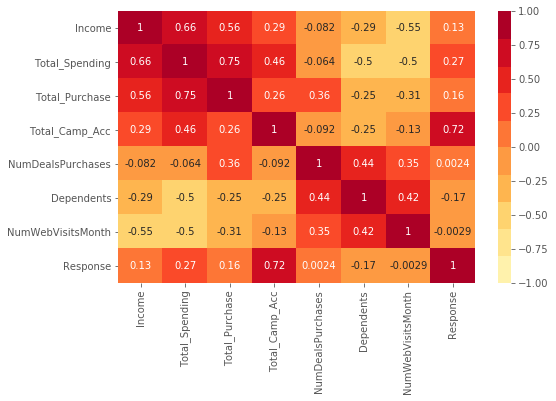

In [17]:
data = df1[['Income', 'Total_Spending', 'Total_Purchase', 'Total_Camp_Acc', 'NumDealsPurchases', 
            'Dependents', 'NumWebVisitsMonth', 'Response' ]]
corr = data.corr()
plt.figure(figsize=(8,5))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("YlOrRd", 10),
    annot = True
)
plt.show()

 - Income is positively correlated with Total_Spending,Total_Purchase, Total_Campaign_Acc, Num_of_Deals_Purchase 
 - Tota_Purchase capacity is negatively correlated with the number of dependents<br><br>
### VISUALIZATION 

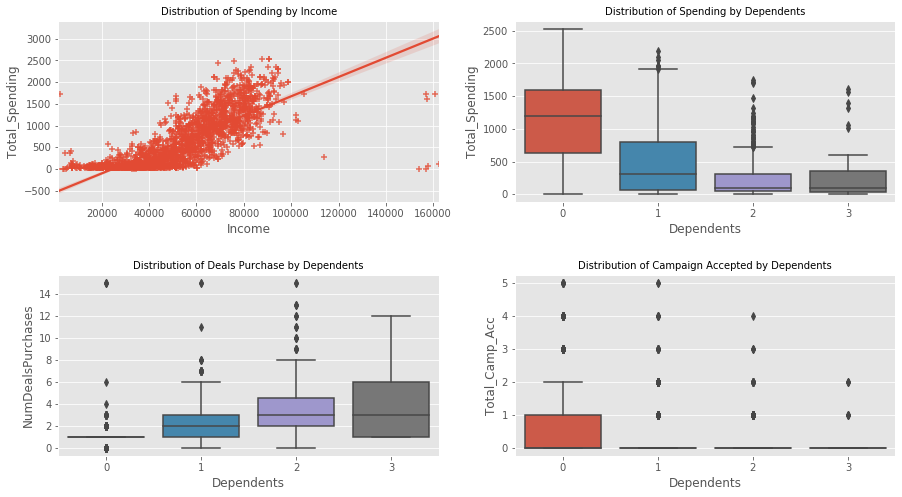

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8)) 
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "Income", y = "Total_Spending", data = df1[df1['Income'] < 200000], marker="+")
axes[0].set_title("Distribution of Spending by Income", fontsize = 10)

sns.boxplot(ax = axes[1], x = "Dependents", y = "Total_Spending", data = df1)
axes[1].set_title("Distribution of Spending by Dependents", fontsize = 10)

sns.boxplot(ax = axes[2], x = "Dependents", y = "NumDealsPurchases", data = df1)
axes[2].set_title("Distribution of Deals Purchase by Dependents", fontsize = 10)

sns.boxplot(ax = axes[3], x = "Dependents", y = "Total_Camp_Acc", data = df1)
axes[3].set_title("Distribution of Campaign Accepted by Dependents", fontsize = 10)

fig.subplots_adjust(hspace=0.4)  
plt.show()

 - As income increases the total_spending also increases.
 - As number of depndents increases the purchase through discounts also increases.
 - But increase in number of dependents doesn't lead to increase in Spending.
 - People with many dependents i.e kids and teens tend not to purchase from advertising campaigns

## Section 02 - Statistical Analysis
 - Please run statistical tests in the form of regression. Find out which feature has the highest impact on number of store purchases!
 - Does US fare significantly better than the Rest of the World in terms of total purchases?
 - Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
<br><br>
<b>What factors are significantly related to the number of store purchases?</b><br>
- We will use use a linear regression model with `NumStorePurchases` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
- Begin by plotting the target variable: 
 

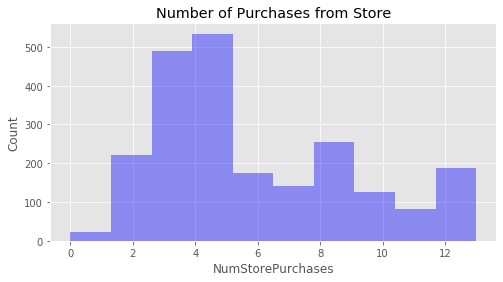

In [19]:
plt.figure(figsize = (8,4))
sns.distplot(df1["NumStorePurchases"], color = "blue", bins = 10, kde = False)
plt.title("Number of Purchases from Store")
plt.ylabel("Count")
plt.show()

<b> Lets remove unnecessary feature `ID` and do one hot encoding of all the categorical features first</b>

In [20]:
df2 = df1.drop(['ID','Year_Birth'], axis = 1)
df2.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Total_Spending,Total_Purchase,Total_Camp_Acc
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,0,1,0,SP,0,1190,15,1
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,0,1,1,0,CA,0,577,18,2


<b>One Hot Encoding</b>
- Lets us first create a separate dataframe with all categorical features to be encoded.
- We have a small number of dummies, i suggest removing the first dummy. 
- For example, i have a variable `Marital_Status` , we don't need all the variables as dummy because it will lead to the proble of dummy variable trap or multicollinearity.



In [21]:
#Create a list of categorical fatures
obj_df = df2.select_dtypes(include=['object']).copy()
print("Number of unique values per categorical feature:\n", obj_df.nunique())

#Convert into dummies
dummies = pd.get_dummies(obj_df, drop_first = True)

#Merge them into original dataframe
df3 = pd.concat([df2, dummies], axis='columns')
df3.head(3)

Number of unique values per categorical feature:
 Education         5
Marital_Status    5
Country           8
dtype: int64


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,0,0,0,0,0,0,1,0
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,0,0,1,0,0,0,0,0,0
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,0,0,0,0,0,1


<b>Train Test Split</b>
- When random_state set to an integer will return same results for each execution i.e same values in train and test datasets.
- If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

In [22]:
from sklearn.model_selection import train_test_split

X = df3.drop(["NumStorePurchases", "Education", "Marital_Status", "Country", "Dt_Customer"], axis = 1)
y = df3.NumStorePurchases

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

print(X.shape)
print(y.shape)

(2233, 40)
(2233,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  2.176914247609507e-12
Median value of target variable:  5.0


<b>Linear Regression Model</b><br>
- Fit linear regression model to training data (30% of dataset)
- Evaluate predictions on test data (70% of dataset) using RMSE:
- Observations: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

<b> What features have the biggest impact on predictions?</b><br><br>
- This concept is called feature importance.
- We'll focus on `permutation importance`. Compared to most other approaches, permutation importance is:
 - fast to calculate,
 - widely used and understood, and
 - consistent with properties we would want a feature importance measure to have.

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top = 5)

Observations:<br>
- In order to increase total sales its better to offer discounts, deals, run campaigns because people are more into online purchase

<b>Does US fare significantly better than the Rest of the World in terms of total purchases?</b>

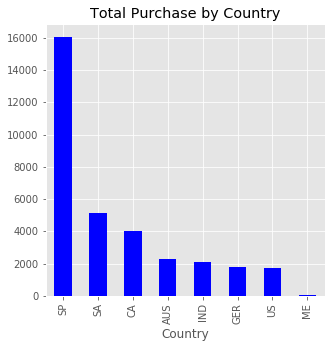

In [28]:
plt.figure(figsize = (5, 5))
df3.groupby('Country')['Total_Purchase'].sum().sort_values(ascending = False).plot(kind = 'bar', color ="blue")
plt.title("Total Purchase by Country")
plt.show()

Spain has the highest number of purchase followed by South Africa

<b> Does people who spent an above average amount on gold in the last 2 years would have more in store purchases.</b>

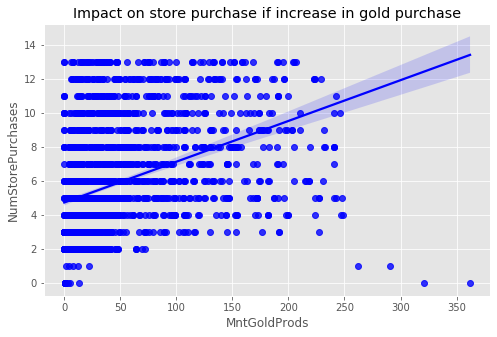

In [29]:
plt.figure(figsize = (8, 5))
sns.regplot(x = "MntGoldProds", y = "NumStorePurchases",  data = df3, color ="blue")
plt.title("Impact on store purchase if increase in gold purchase")
plt.show()

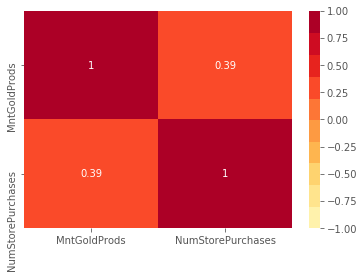

In [30]:
#By default it uses pearson's correlation method
correlation = df3[["MntGoldProds", "NumStorePurchases"]]
corre = correlation.corr(method = "kendall")
ax = sns.heatmap(
    corre, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("YlOrRd", 10),
    annot = True)

Positive correlation between spending on gold and number of store purchases

### Thank You